说明：
LassoCV用于计算稀疏矩阵的特征
1.用LassoCV法计算特征数据较少的数据集
2.用SelectFromModel设定特征重要性的门槛
3.用SelectFromModel的threshold来逼近最优特征数

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
%matplotlib inline

In [3]:
#load data
boston = datasets.load_boston()
X,y = boston['data'], boston['target']

In [9]:
for key, value in boston.items():
    try:
        print(key, value.shape)
    except:
        print(key)

data (506, 13)
target (506,)
feature_names (13,)
DESCR


In [10]:
clf = LassoCV()


In [11]:
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X,y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
        prefit=False, threshold=0.25)

In [12]:
n_features = sfm.transform(X).shape[1]
print(n_features)

5


In [13]:
#设定选取参数的过滤条件,调整threshold直到最后的特征数为2
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

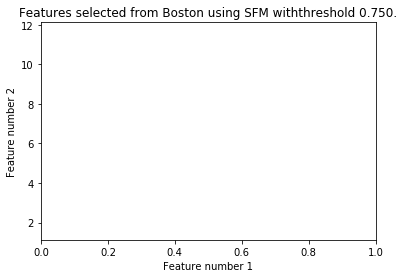

In [14]:
#plot
plt.title("Features selected from Boston using SFM with" 
          "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:,0]
feature2 = X_transform[:,1]
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()